In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [58]:
PROJECT_PATH = '../'
NORM_PATH = '/scratch/ceph/szalay/swei20/AE/norm_flux.h5'
sys.path.insert(0, PROJECT_PATH)

In [110]:
with h5py.File(NORM_PATH, "r") as f:
    flux = f["flux"][()]
    wave = f["wave"][()]
    para = f["para"][()]

In [133]:
from lv.base.convolve import Convolve

In [79]:
def get_flux_in_Wrange(flux, wave, Ws):
    start = np.digitize(Ws[0], wave)
    end = np.digitize(Ws[1], wave)
    return flux[:, start:end], wave[start:end]

In [111]:
def save(SAVE_PATH, flux, wave, para):
    with h5py.File(SAVE_PATH, 'w') as f:
        f.create_dataset('flux', data = flux, shape=flux.shape)
        f.create_dataset('wave', data = wave, shape=wave.shape)
        f.create_dataset('para', data = para, shape=para.shape)

In [154]:
def get_convolved(flux, wave, Ws, name="", R=5000):
    R_PATH = f'/scratch/ceph/szalay/swei20/AE/norm_flux_{name}_R{Ws[2]}.h5'
    print(R_PATH)
    flux0, wave0 = get_flux_in_Wrange(flux, wave, Ws)
    print(flux0.shape, wave0.shape, wave0[0], wave0[-1])
    if Ws[2] < R:
        c = Convolve(wave0, wref=Ws[3], res_in=R, res_out=Ws[2])
        i=0
        flux00 = c.convolve(flux0[i])
        c.plot_convolved(flux0[i], flux00, lb=Ws[0], ub = Ws[1], log=0)
        c.plot_convolved(flux0[i], flux00, lb=Ws[3], ub = Ws[3]+100, log=0)
        flux_conv = c.convolve_all(flux0)
    else:
        flux_conv = flux0
    save(R_PATH, flux_conv, wave0, para)
    return flux_conv, wave0

# NIR

/scratch/ceph/szalay/swei20/AE/norm_flux_NIR_R4300.h5
(116614, 2929) (2929,) 9400.834 12598.7539


100%|██████████| 116614/116614 [00:01<00:00, 66349.67it/s]


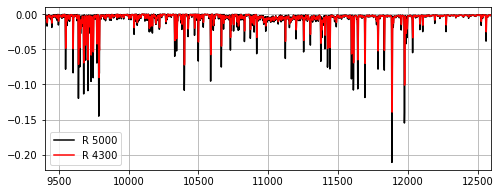

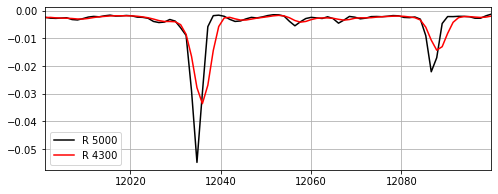

In [159]:
flux_NIR, wave_NIR = get_convolved(flux,wave, [9400, 12600, 4300, 12000], name="NIR")

# Blue

/scratch/ceph/szalay/swei20/AE/norm_flux_Blue_R2300.h5
(116614, 5368) (5368,) 3800.3757 6499.9795


100%|██████████| 116614/116614 [00:12<00:00, 9458.18it/s]


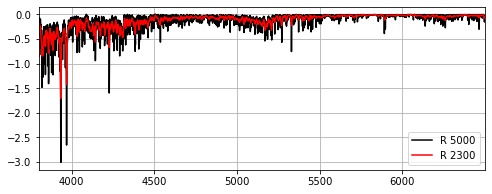

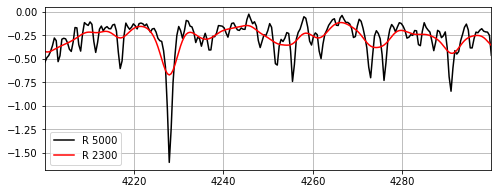

In [160]:
flux_Blue, wave_Blue = get_convolved(flux,wave, [3800, 6500, 2300, 4200], name="Blue")

# RED L

/scratch/ceph/szalay/swei20/AE/norm_flux_RedL_R3000.h5
(116614, 4316) (4316,) 6300.3115 9699.7324


100%|██████████| 116614/116614 [00:04<00:00, 26042.23it/s]


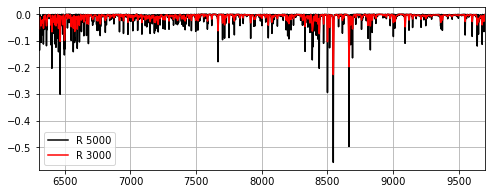

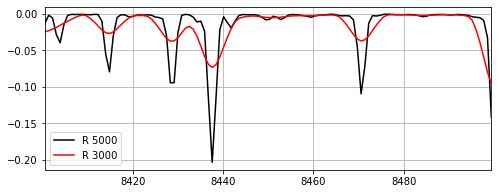

In [161]:
flux_RL, wave_RL = get_convolved(flux, wave, [6300, 9700, 3000, 8400], name="RedL")

# RedM

In [162]:
flux_RM, wave_RM = get_convolved(flux, wave, [7100, 8850, 5000, None], name="RedM")

/scratch/ceph/szalay/swei20/AE/norm_flux_RedM_R5000.h5
(116614, 2204) (2204,) 7100.0293 8849.832


In [163]:
flux_RM.shape

(116614, 2204)

In [157]:
with h5py.File("/scratch/ceph/szalay/swei20/AE/norm_flux_RedM_R5000.h5", 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [158]:
flux0.shape

(116614, 2204)